In [18]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import re

# Create a DataFrame with random numbers
df = pd.DataFrame({
    'a': np.random.randn(5),
    'b': np.random.randn(5),
    'c': np.random.randn(5),
    'd': np.random.randn(5),
})

# Rescaling function to 0-1 range
def rescale01(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply the rescale01 function to each column
df = df.apply(rescale01)

x = pd.Series([1, 2, 3, np.nan, 5])
x_rescaled = rescale01(x)
print(x_rescaled)
# Example usage of the rescale function
x = pd.Series(list(range(1, 11)) + [np.inf])
x_rescaled = rescale01(x)
print(x_rescaled)

# Z-score normalization function
def z_score(x):
    return (x - x.mean()) / x.std()

# Clamping function
def clamp(x, min_value, max_value):
    return np.clip(x, min_value, max_value)

values = np.arange(1, 11)
print(clamp(values, 3, 7))

# Function to capitalize the first letter of a string
def first_upper(x):
    return x[0].upper() + x[1:]

print(first_upper("hello"))

# Function to clean numeric strings and convert to a float
def clean_number(x):
    is_pct = "%" in x
    num = float(re.sub(r'[%$,]', '', x))
    return num / 100 if is_pct else num

print(clean_number("$12,300"))
print(clean_number("45%"))

# Function to replace specific values with NaN
def fix_na(x):
    return x.replace([997, 998, 999], np.nan)

# Function to concatenate a list with commas and "and"
def commas(x):
    return ', '.join(x[:-1]) + ' and ' + x[-1] if len(x) > 1 else x[0]

print(commas(["cat", "dog", "pigeon"]))

# Define the coefficient of variation function
def cv(x, na_rm=False):
    if na_rm:
        x = x[~np.isnan(x)]  # Remove NaN values if na_rm is True
    return np.std(x) / np.mean(x)

# Generate 100 uniform random numbers between 0 and 50
random_values_50 = np.random.uniform(0, 50, 100)
cv_50 = cv(random_values_50)

# Generate 100 uniform random numbers between 0 and 500
random_values_500 = np.random.uniform(0, 500, 100)
cv_500 = cv(random_values_500)

print((cv_50, cv_500))

# Function to count missing values in a Series
def n_missing(x):
    return x.isna().sum()

# Function to calculate the Mean Absolute Percentage Error
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))


0    0.00
1    0.25
2    0.50
3     NaN
4    1.00
dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    NaN
dtype: float64
[3 3 3 4 5 6 7 7 7 7]
Hello
12300.0
0.45
cat, dog and pigeon
(0.6064535249818536, 0.5215447954371465)


In [19]:
import pandas as pd

def grouped_mean(df, group_var, mean_var):
    return df.groupby(group_var)[mean_var].mean().reset_index()

# Sample data creation, assuming 'group_var' and 'mean_var' are column names
df = pd.DataFrame({
    'group_var': ['g', 'g', 'g', 'h', 'h'],
    'mean_var': [1, 2, 3, 4, 5],
    'group': [1, 1, 1, 2, 2],
    'x': [10, 20, 30, 40, 50],
    'y': [100, 200, 300, 400, 500]
})

# Using the function with the dataframe
print(grouped_mean(df, 'group', 'x'))
print(grouped_mean(df, 'group', 'y'))


   group     x
0      1  20.0
1      2  45.0
   group      y
0      1  200.0
1      2  450.0


In [20]:
import pandas as pd

def grouped_mean(df, group_var, mean_var):
    # The double braces {{ }} are not needed in Python, you can directly pass the column names as strings.
    return df.groupby(group_var).agg({mean_var: 'mean'}).reset_index()

# Assuming df is defined as before, or you can define it here
# Here's how you would call the function:
result = grouped_mean(df, 'group', 'x')
print(result)

   group     x
0      1  20.0
1      2  45.0


In [21]:
import pandas as pd

# Load the dataset
df_diamonds = pd.read_csv('data/diamonds.csv')

# Define the summary function
def summary6(data, var):
    return data.agg({
        var: ['min', 'mean', 'median', 'max', lambda x: x.isna().sum()]
    }).rename(index={'<lambda_0>': 'n_miss'}).assign(n=len(data))

# Call the function and pass the 'carat' column
summary6_carat = summary6(df_diamonds, 'carat')
summary6_carat

,carat,n
min,0.20000,53940
mean,0.79794,53940
median,0.70000,53940
max,5.01000,53940
<lambda>,0.00000,53940


In [22]:
# Group by 'cut' and then apply the summary function to 'carat'
summary6_grouped = df_diamonds.groupby('cut').apply(lambda x: summary6(x, 'carat')).reset_index()

# Dropping the level_1 column that was created due to multi-indexing after groupby
summary6_grouped = summary6_grouped.drop(columns=['level_1'])

summary6_grouped

,cut,carat,n
0,Fair,0.220000,1610
1,Fair,1.046137,1610
2,Fair,1.000000,1610
3,Fair,5.010000,1610
4,Fair,0.000000,1610
5,Good,0.230000,4906
6,Good,0.849185,4906
7,Good,0.820000,4906
8,Good,3.010000,4906
9,Good,0.000000,4906


In [23]:
# Define the count_prop function
def count_prop(df, var, sort=False):
    count_df = df[var].value_counts(sort=sort).reset_index()
    count_df.columns = [var, 'n']
    count_df['prop'] = count_df['n'] / count_df['n'].sum()
    return count_df

# Call the function with the 'clarity' column
count_prop_clarity = count_prop(df_diamonds, 'clarity', sort=False)
count_prop_clarity

,clarity,n,prop
0,SI2,9194,0.170449
1,SI1,13065,0.242214
2,VS1,8171,0.151483
3,VS2,12258,0.227253
4,VVS2,5066,0.093919
5,VVS1,3655,0.067760
6,I1,741,0.013737
7,IF,1790,0.033185


In [24]:
# Load the flights dataset
df_flights = pd.read_csv('data/flights.csv')

# Define the unique_where function for the flights dataset
def unique_where(df, condition, var):
    # The function filters the dataframe based on the condition and then finds unique values of 'var'
    unique_values = df.query(condition)[var].drop_duplicates().sort_values()
    return unique_values

# Find all unique destinations for flights in December
unique_destinations_in_december = unique_where(df_flights, 'month == 12', 'dest')
unique_destinations_in_december

84021    ABQ
84034    ALB
83175    ATL
83424    AUS
83668    AVL
        ... 
83408    SYR
83209    TPA
84057    TUL
84010    TYS
83360    XNA
Name: dest, Length: 96, dtype: object

In [25]:
# Define the subset_flights function for the flights dataset
def subset_flights(df, rows, cols):
    query_str = rows if isinstance(rows, str) else " & ".join(f"{k} == {v}" for k, v in rows.items())
    cols_to_select = ['time_hour', 'carrier', 'flight'] + cols if isinstance(cols, list) else ['time_hour', 'carrier', 'flight', cols]
    subset_df = df.query(query_str)[cols_to_select]
    return subset_df

# As an example, let's filter flights that departed in December and select columns 'dest' and 'air_time'
# Note: The actual conditions and columns to select would depend on what the user wants to filter/select.
example_subset = subset_flights(df_flights, {'month': 12}, ['dest', 'air_time'])
example_subset.head()

,time_hour,carrier,flight,dest,air_time
83161,2013-12-01 23:00:00,B6,745,PSE,195.0
83162,2013-12-01 23:00:00,B6,839,BQN,186.0
83163,2013-12-01 05:00:00,US,1895,CLT,86.0
83164,2013-12-01 05:00:00,UA,1487,IAH,193.0
83165,2013-12-01 05:00:00,AA,2243,MIA,144.0


In [26]:
# Define the count_missing function
def count_missing(df, group_vars, x_var):
    # Group by the specified variables and calculate the number of missing values for x_var
    result = df.groupby(group_vars).agg(n_miss=(x_var, lambda x: x.isna().sum())).reset_index()
    return result

# Call the count_missing function with the 'flights' dataframe
missing_dep_time = count_missing(df_flights, ['year', 'month', 'day'], 'dep_time')
missing_dep_time.head()

,year,month,day,n_miss
0,2013,1,1,4
1,2013,1,2,8
2,2013,1,3,10
3,2013,1,4,6
4,2013,1,5,3


In [27]:
# Define the count_missing function with the correction for 'pick'
def count_missing(df, group_vars, x_var):
    # Group by the specified variables and calculate the number of missing values for x_var
    # The 'pick' functionality is implicit in the groupby method when passing the list of column names.
    result = df.groupby(group_vars).agg(n_miss=(x_var, lambda x: x.isna().sum())).reset_index()
    return result

missing_dep_time_updated = count_missing(df_flights, ['year', 'month', 'day'], 'dep_time')
missing_dep_time_updated.head()


,year,month,day,n_miss
0,2013,1,1,4
1,2013,1,2,8
2,2013,1,3,10
3,2013,1,4,6
4,2013,1,5,3


In [28]:
# Define the count_wide function
def count_wide(data, rows, cols):
    # First, count occurrences
    count_df = data.groupby(rows + cols).size().reset_index(name='n')
    # Then pivot the table to get a wide format
    wide_df = count_df.pivot_table(index=rows, columns=cols, values='n', fill_value=0).reset_index()
    # Sort the column headers if needed, though pivot_table should automatically sort them
    wide_df.columns.name = None  # Remove the categorization of columns
    return wide_df

# Call the function with the 'diamonds' dataframe
wide_diamonds = count_wide(df_diamonds, ['clarity', 'color'], ['cut'])
wide_diamonds.head()

,clarity,color,Fair,Good,Ideal,Premium,Very Good
0,I1,D,4,8,13,12,5
1,I1,E,9,23,18,30,22
2,I1,F,35,19,42,34,13
3,I1,G,53,19,16,46,16
4,I1,H,52,14,38,46,12


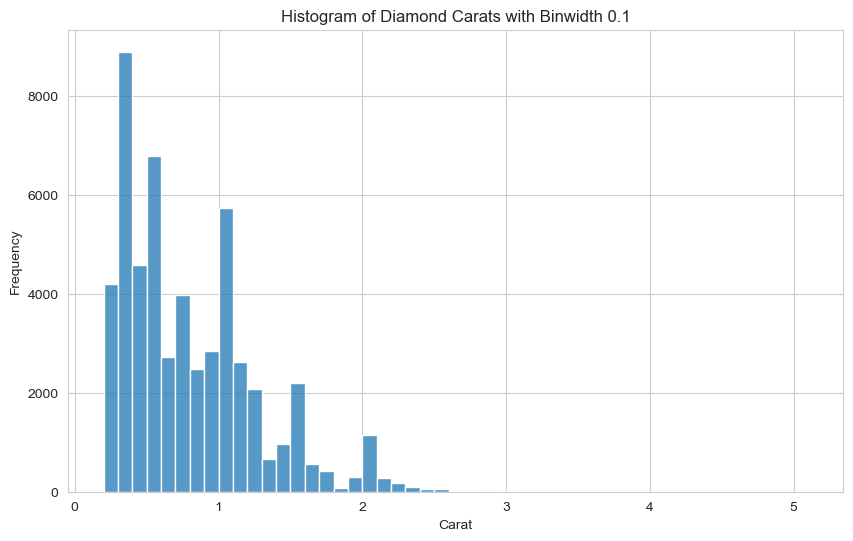

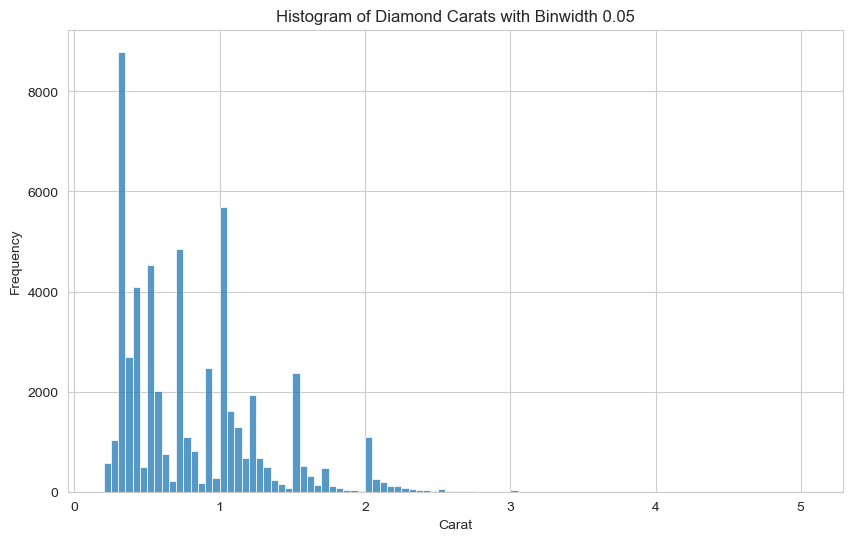

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Histogram with binwidth of 0.1
plt.figure(figsize=(10, 6))
sns.histplot(df_diamonds['carat'], binwidth=0.1, kde=False)
plt.title('Histogram of Diamond Carats with Binwidth 0.1')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

# Histogram with binwidth of 0.05
plt.figure(figsize=(10, 6))
sns.histplot(df_diamonds['carat'], binwidth=0.05, kde=False)
plt.title('Histogram of Diamond Carats with Binwidth 0.05')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

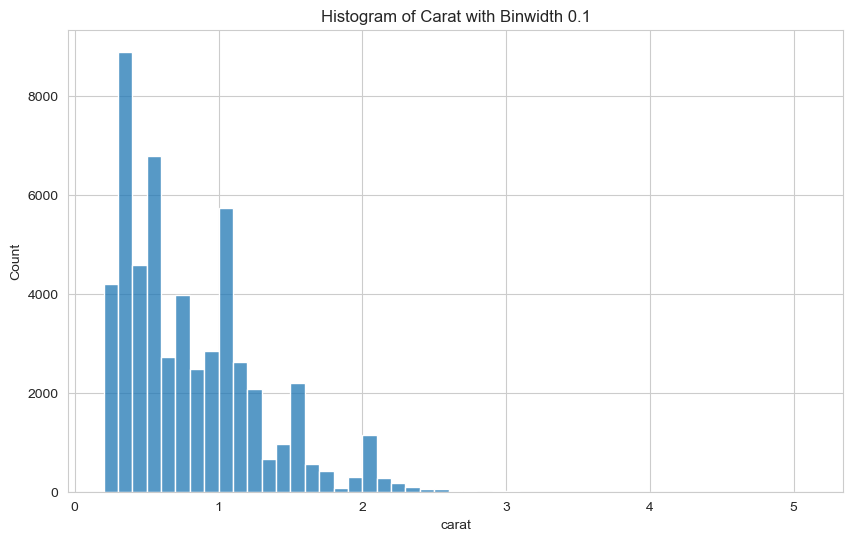

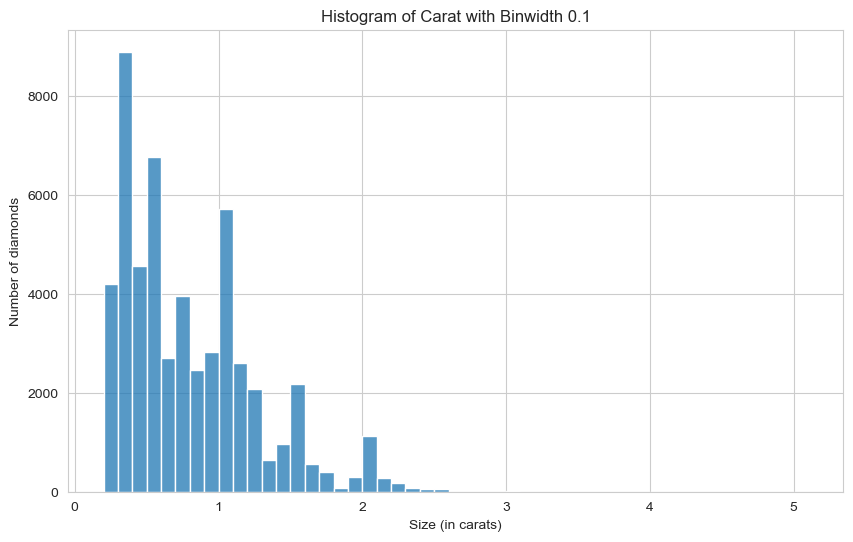

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the histogram function
def histogram(df, var, binwidth=None, x_label=None, y_label=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, binwidth=binwidth, kde=False)
    plt.title(f'Histogram of {var.title()} with Binwidth {binwidth}')
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.show()

# Call the histogram function for the 'carat' variable with a binwidth of 0.1
histogram(df_diamonds, 'carat', binwidth=0.1)

# Call the histogram function for the 'carat' variable with a binwidth of 0.1 and custom labels
histogram(df_diamonds, 'carat', binwidth=0.1, x_label="Size (in carats)", y_label="Number of diamonds")

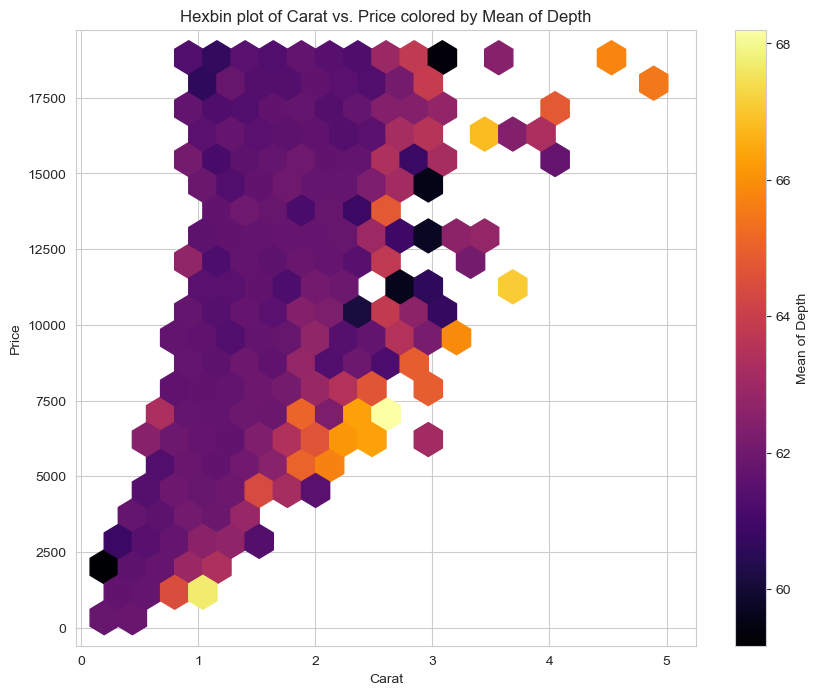

In [31]:
import numpy as np

# Define the hex_plot function
def hex_plot(df, x, y, z, bins=20, fun='mean'):
    # Define a function to calculate the mean or other summary function
    def calculate_summary(arr):
        if fun == 'mean':
            return np.mean(arr)
        else:
            # You can add more functions as needed
            return np.mean(arr)
        
    plt.figure(figsize=(10, 8))
    # Create a hexbin plot with the specified summary function
    hb = plt.hexbin(x=df[x], y=df[y], C=df[z], gridsize=bins, reduce_C_function=calculate_summary, cmap='inferno')
    plt.colorbar(hb, label=f'{fun.capitalize()} of {z.title()}')
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.title(f'Hexbin plot of {x.title()} vs. {y.title()} colored by {fun.capitalize()} of {z.title()}')
    plt.grid(True)
    plt.show()

# Call the hex_plot function with the diamonds dataset
hex_plot(df_diamonds, 'carat', 'price', 'depth', bins=20, fun='mean')

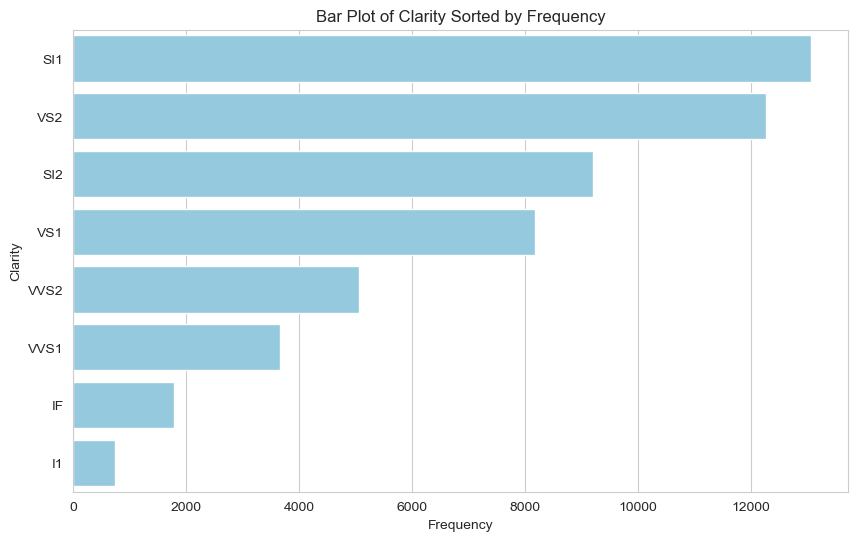

In [32]:
# Define the sorted_bars function
def sorted_bars(df, var):
    # Sort the values based on frequency
    sorted_values = df[var].value_counts().index
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=var, order=sorted_values, color='skyblue')
    plt.title(f'Bar Plot of {var.title()} Sorted by Frequency')
    plt.xlabel('Frequency')
    plt.ylabel(var.title())
    plt.show()

# Call the sorted_bars function with the diamonds dataset and the 'clarity' variable
sorted_bars(df_diamonds, 'clarity')

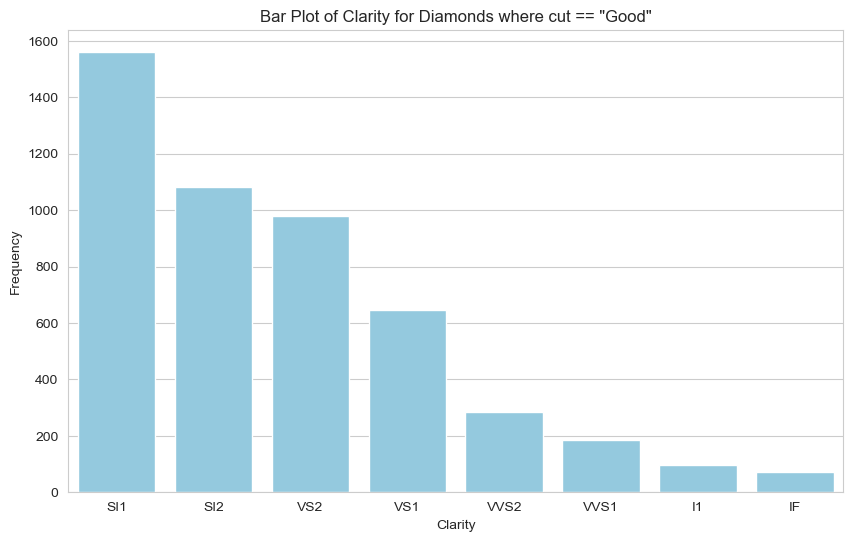

In [33]:
# Define the conditional_bars function
def conditional_bars(df, condition, var):
    # Filter the dataframe based on the condition
    filtered_df = df.query(condition)
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=filtered_df, x=var, order=filtered_df[var].value_counts().index, color='skyblue')
    plt.title(f'Bar Plot of {var.title()} for Diamonds where {condition}')
    plt.xlabel(var.title())
    plt.ylabel('Frequency')
    plt.show()

# Call the conditional_bars function with the diamonds dataset
conditional_bars(df_diamonds, 'cut == "Good"', 'clarity')

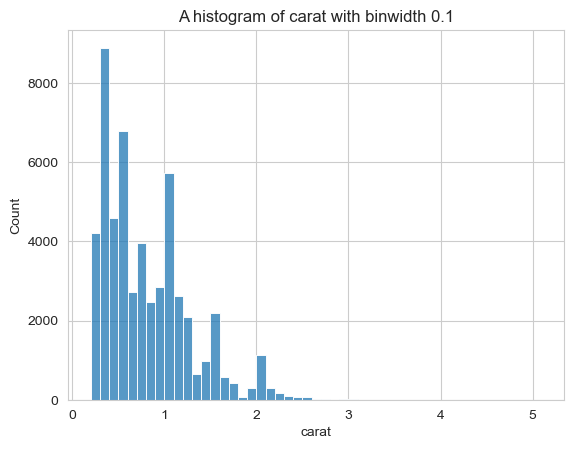

In [35]:
def histogram(df, var, binwidth=None):
    # Importing necessary libraries
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Set the aesthetic style of the plots
    sns.set_style('whitegrid')

    # Create the histogram
    sns.histplot(df[var], binwidth=binwidth)

    # Show the plot
    plt.show()

def labeled_histogram(df, var, binwidth):
    # Importing necessary libraries
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Set the aesthetic style of the plots
    sns.set_style('whitegrid')

    # Create the histogram
    ax = sns.histplot(df[var], binwidth=binwidth)

    # Label the plot
    label = f"A histogram of {var} with binwidth {binwidth}"
    ax.set_title(label)

    # Show the plot
    plt.show()

# Call the histogram function with the diamonds dataframe, 'carat' variable, and 0.1 binwidth
labeled_histogram(df_diamonds, 'carat', 0.1)

/Users/developerX/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


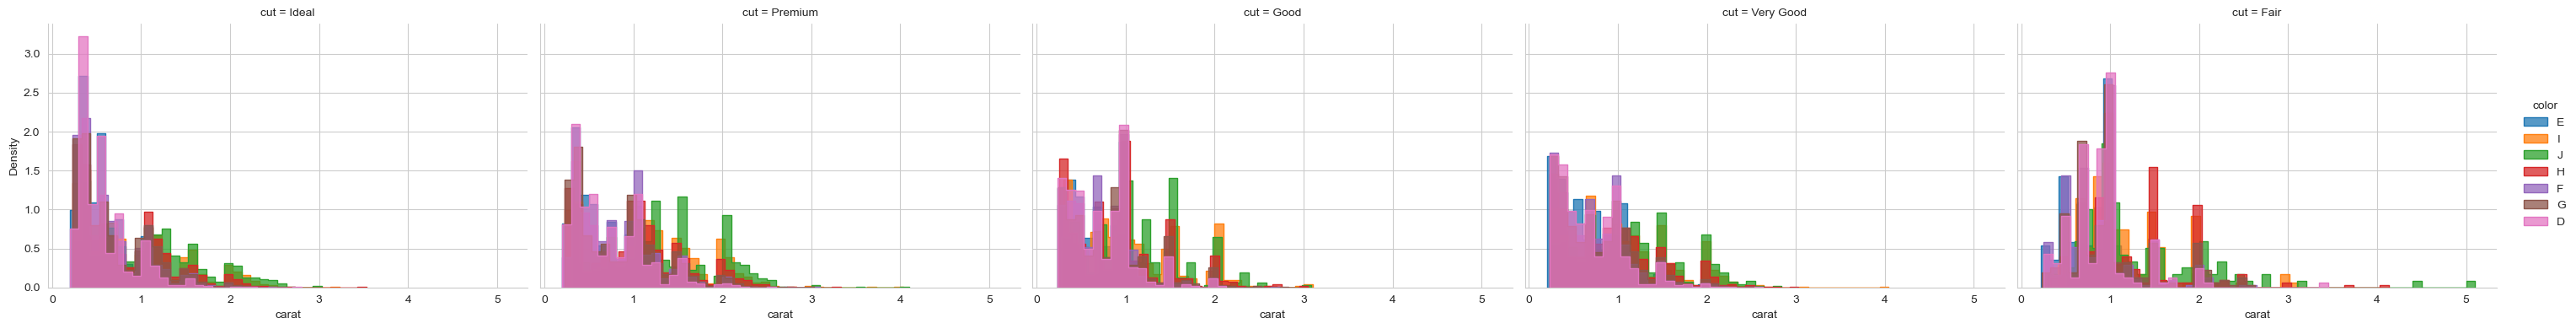

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
def density_plot(df, color, facets, binwidth=0.1):
    sns.set_style('whitegrid')

    # Creating a FacetGrid
    g = sns.FacetGrid(df, col=facets, hue=color, height=4, aspect=1.5)
    g.map(sns.histplot, 'carat', stat='density', common_norm=False, binwidth=binwidth, element='step', multiple='layer')

    # Adding a legend
    g.add_legend()

    # Showing the plot
    plt.show()

# Calling the density_plot function with the diamonds dataframe, 'color' as the color, and 'cut' as the facet.
density_plot(df_diamonds, 'color', 'cut', 0.1)

/Users/developerX/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


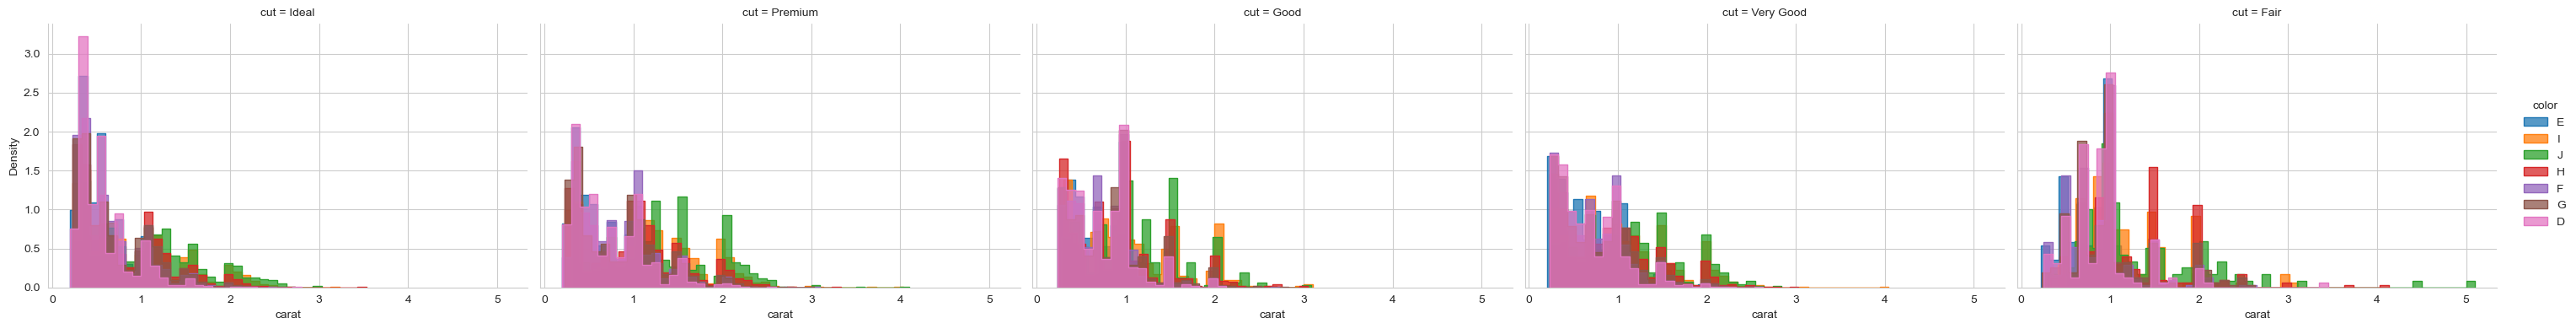

In [39]:
def density(df, color, facets, binwidth=0.1):
    # Set the aesthetic style of the plots
    sns.set_style('whitegrid')
    # Create the density plot
    g = sns.histplot(df, x="carat", hue=color, element="step", stat="density", common_norm=False, binwidth=binwidth)
    # Adding facets
    g.facet_data(facets)
    # Show the plot
    plt.show()
    
density_plot(df_diamonds, 'color', 'cut', 0.1)    